# Data Analysis

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [18]:
data_path = r"/mnt/d/Documentos/Trabajo/Research/LSTM-Spectral/data/2018PM10.xls"
df = pd.read_excel(data_path)
df["FECHA"] = pd.to_datetime(df["FECHA"])
df.set_index("FECHA", inplace=True)
df = df.replace(-99, np.nan)
df.head()

,HORA,ACO,AJM,ATI,BJU,CAM,CHO,CUA,CUT,FAC,...,MPA,PED,SAG,SFE,TAH,TLA,TLI,UIZ,VIF,XAL
FECHA,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1,125.0,92.0,NaN,78.0,NaN,NaN,137.0,100.0,52.0,...,NaN,NaN,101.0,86.0,172.0,90.0,136.0,NaN,137.0,67.0
2018-01-01,2,98.0,95.0,NaN,73.0,NaN,NaN,111.0,187.0,37.0,...,NaN,NaN,117.0,61.0,138.0,127.0,157.0,NaN,175.0,58.0
2018-01-01,3,88.0,81.0,NaN,82.0,NaN,NaN,85.0,100.0,64.0,...,NaN,NaN,98.0,51.0,249.0,134.0,168.0,NaN,166.0,50.0
2018-01-01,4,82.0,59.0,55.0,87.0,NaN,NaN,58.0,75.0,48.0,...,NaN,NaN,87.0,47.0,150.0,105.0,210.0,NaN,170.0,63.0
2018-01-01,5,96.0,48.0,57.0,69.0,NaN,NaN,52.0,134.0,42.0,...,NaN,NaN,97.0,44.0,175.0,56.0,161.0,NaN,119.0,111.0


In [21]:
cols = {}
for col in df.columns:
    cols[col] = df[col].isna().mean()
    
pd.DataFrame(cols, index=['Missing Ratio']).T.sort_values(by='Missing Ratio', ascending=False)

,Missing Ratio
MPA,1.000000
LLA,1.000000
LPR,1.000000
PED,1.000000
TLI,0.953995
INN,0.516096
TAH,0.508676
UIZ,0.437100
CHO,0.421233
CAM,0.311416


In [32]:
# Select only ATI col
df_selected = df[["ATI"]].dropna()
df_selected

,ATI
FECHA,
2018-01-01,55.0
2018-01-01,57.0
2018-01-01,51.0
2018-01-01,26.0
2018-01-01,32.0
...,...
2018-12-31,88.0
2018-12-31,86.0
2018-12-31,76.0


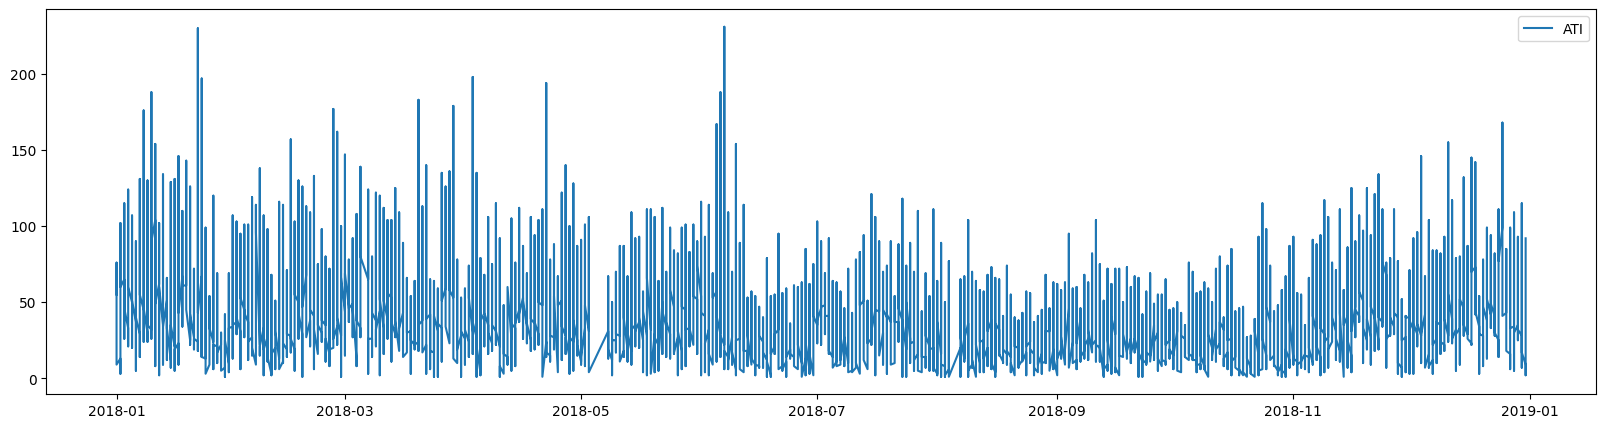

In [36]:
# Plot data
plt.figure(figsize=(20, 5))
plt.plot(df_selected["ATI"], label="ATI")
plt.legend()
plt.show()

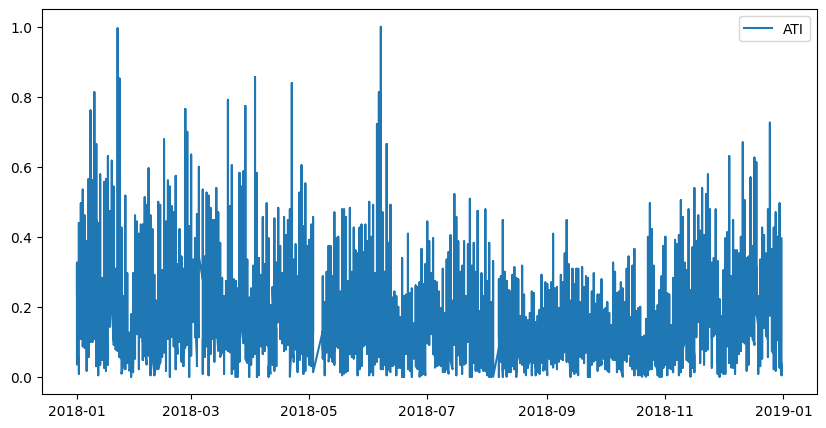

In [51]:
# Perform normalization and standardization
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected.values)
df_scaled = pd.DataFrame(df_scaled, index=df_selected.index, columns=df_selected.columns)

# Plot data
plt.figure(figsize=(10, 5))
plt.plot(df_scaled, label="ATI")
plt.legend()
plt.show()

In [52]:
df_scaled.to_csv(r"/mnt/d/Documentos/Trabajo/Research/LSTM-Spectral/data/2018PM10_selected.csv")

In [54]:
np_array = np.array(df_scaled.values)
np_array
np.save(r"/mnt/d/Documentos/Trabajo/Research/LSTM-Spectral/data/2018PM10.npz", np_array)